In [ ]:
!pip install python-geohash
!pip install pygeohash
!pip install geopy
# !pip install python-igraph --prefer-binary
!pip install seaborn
!pip install statsmodels
!pip install esda
!pip install libpysal
# !pip install python-louvain
# !pip install contextily

In [1]:
import warnings
from collections import Counter

warnings.filterwarnings("ignore")

In [15]:
from read_bothdecision import *
from compare_geohash import *
from more_grained_analysis import *

# bbox=(-82.0, 26.48, -81.92, 26.52)
bbox=(-82.04150698533131, 26.490448860026532, -81.87502336164845, 26.604200914701607)
# bbox=(-81.98048446650292,26.487614477169117,-81.93348521668332,26.52132073874843)
min_lon, min_lat, max_lon, max_lat = bbox
decision_df, households_df = load_decision_data(bbox=bbox)
network_dict = load_network_files('results',bbox=bbox)
result = compare_geohash_overlap(decision_df, households_df, network_dict)
network_dict, mapping=fast_match_network_to_households(households_df, network_dict)
result = compare_geohash_overlap(decision_df, households_df, network_dict)
damage_df=pd.read_csv('hurricane_ian_damage_filtered2.csv')
damage_df = damage_df[ (damage_df['Longitude'] >= min_lon) & (damage_df['Longitude'] <= max_lon) 
                        & (damage_df['Latitude'] >= min_lat) & (damage_df['Latitude'] <= max_lat) ]
damage_df = compute_geohash_overlap(damage_df, households_df, precision=8)

[INFO] results/Group_social_network_2022-08-01.csv: kept 124875 edges, 7817 nodes in bbox
[INFO] results/Group_social_network_2022-09-01.csv: kept 76571 edges, 6557 nodes in bbox
[INFO] results/Group_social_network_2022-10-01.csv: kept 139558 edges, 10046 nodes in bbox
[INFO] results/Group_social_network_2022-11-01.csv: kept 129182 edges, 8756 nodes in bbox
[INFO] results/Group_social_network_2022-12-01.csv: kept 150352 edges, 9135 nodes in bbox
[INFO] results/Group_social_network_2023-01-01.csv: kept 2050 edges, 993 nodes in bbox
[INFO] results/Group_social_network_2023-02-01.csv: kept 1739 edges, 931 nodes in bbox
[INFO] results/Group_social_network_2023-03-01.csv: kept 1221 edges, 767 nodes in bbox
[INFO] results/Group_social_network_2023-04-01.csv: kept 1200 edges, 737 nodes in bbox
[INFO] results/Group_social_network_2023-05-01.csv: kept 1255 edges, 765 nodes in bbox
[INFO] results/Group_social_network_2023-06-01.csv: kept 1388 edges, 825 nodes in bbox
[INFO] results/Group_social_

In [3]:
# community, node_to_comm=community_detection(network_dict, method="walktrap")
# community, node_to_comm = community_detection_geographic(network_dict,eps_meters=100)
# community, node_to_comm = community_detection_geo_louvain(network_dict,distance_scale=1000)
# communities, node_to_comm = community_detection_geographic_census(network_dict,"lee_county_census_block/lee_blocks.shp")
communities, node_to_comm = community_detection_geographic_census_merge(network_dict, "lee_county_census_block/lee_blocks.shp",min_nodes=100)

In [4]:
from calculate_correlation import *
num_nodes=30
correlation_metrix=compute_decision_cohesion(decision_df, network_dict, node_to_comm, min_nodes=num_nodes)

In [6]:
m= plot_communities_on_html_map(node_to_comm)

Map saved to: communities_map.html


In [5]:
community_features=community_analysis(damage_df, node_to_comm, node_num=num_nodes)

In [17]:
print(community_graph)

   community_id  num_nodes  num_edges  avg_degree   density  avg_clustering  \
0             2        122         64    1.049180  0.008671        0.051093   
1             1        117         66    1.128205  0.009726        0.021049   
2             0        111         99    1.783784  0.016216        0.096004   
3             3        111         74    1.333333  0.012121        0.063428   
4             4        111         39    0.702703  0.006388        0.019520   
5            13        101         65    1.287129  0.012871        0.043784   
6             6         77         45    1.168831  0.015379        0.039435   
7             9         75         66    1.760000  0.023784        0.122063   
8             7         74         22    0.594595  0.008145        0.051802   
9            11         52         31    1.192308  0.023379        0.103953   
10           18         49         34    1.387755  0.028912        0.121591   
11            8         37         14    0.756757  0

In [11]:
community_graph=community_decision_analysis(network_dict, node_to_comm, decision_df, node_num=num_nodes)

In [12]:
corr_features=regression_cohesion_vs_features(correlation_metrix, community_features, community_graph)

In [13]:
corr_features

,Dependent,Independent,R2,p_value
0,Positive_Cohesion,NoDamage,0.424648,0.015815
1,Positive_Cohesion,Mean_BldgValue,0.019347,0.650413
2,Positive_Cohesion,Mean_EstLoss,0.000561,0.938800
3,Positive_Cohesion,avg_degree,0.495224,0.007268
4,Positive_Cohesion,density,0.624825,0.001298
5,Positive_Cohesion,avg_clustering,0.132553,0.221344
6,Negative_Cohesion,NoDamage,0.505840,0.006414
7,Negative_Cohesion,Mean_BldgValue,0.241338,0.088222
8,Negative_Cohesion,Mean_EstLoss,0.107488,0.274144
9,Negative_Cohesion,avg_degree,0.233720,0.094189


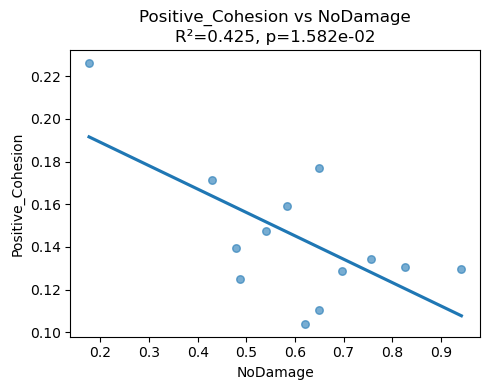

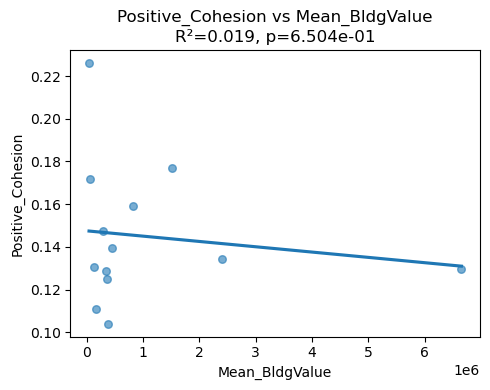

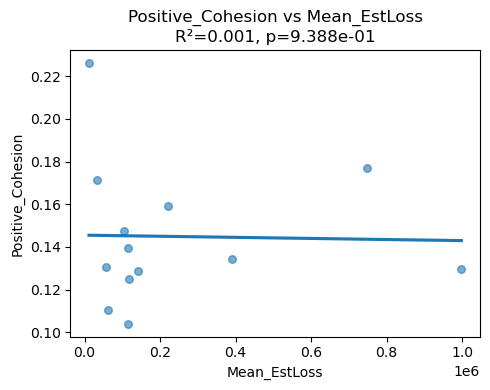

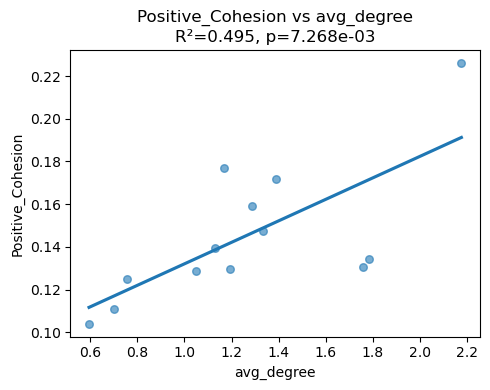

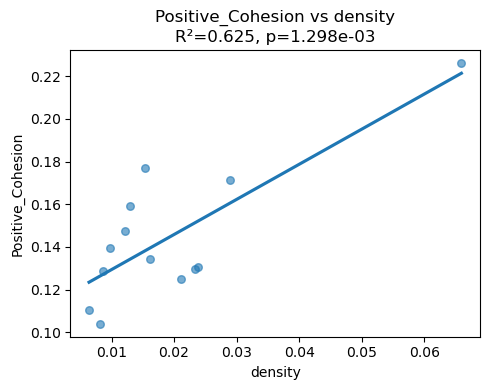

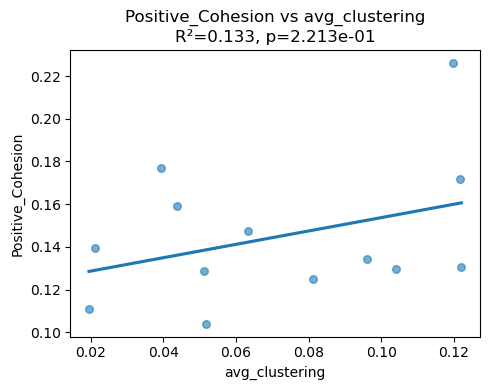

,Dependent,Independent,R2,p_value
0,Positive_Cohesion,NoDamage,0.424648,0.015815
1,Positive_Cohesion,Mean_BldgValue,0.019347,0.650413
2,Positive_Cohesion,Mean_EstLoss,0.000561,0.938800
3,Positive_Cohesion,avg_degree,0.495224,0.007268
4,Positive_Cohesion,density,0.624825,0.001298
5,Positive_Cohesion,avg_clustering,0.132553,0.221344
6,Negative_Cohesion,NoDamage,0.505840,0.006414
7,Negative_Cohesion,Mean_BldgValue,0.241338,0.088222
8,Negative_Cohesion,Mean_EstLoss,0.107488,0.274144
9,Negative_Cohesion,avg_degree,0.233720,0.094189


In [14]:
regression_cohesion_vs_features_plot(correlation_metrix, community_features, community_graph)

In [ ]:
analyze_social_correlation_by_community(network_dict, node_to_comm, decision_df,
                                            min_nodes=30, plot=True)

In [ ]:
_=monthly_rho_lines_id(network_dict, node_to_comm, decision_df,
                      min_valid=10, min_nodes=30,plot_cids=[9,15,0,5,6])

In [10]:
import pandas as pd
import networkx as nx

households_df = households_df.copy()
households_df["decider"] = (
    households_df["has_repair_decision"] | households_df["has_sales_decision"]
)

damage_groups = {
    lvl: set(damage_df.loc[damage_df["DamageLevel"] == lvl, "damage_geohash"])
    for lvl in ["Major", "Affected", "Minor", "Destroyed"]
}

edges_all = pd.concat(network_dict.values(), ignore_index=True)
edges_all = edges_all.dropna(subset=["group_1", "group_2"])

results = []

for lvl, geo_set in damage_groups.items():
    valid_nodes = geo_set.intersection(set(households_df["geohash8"]))
    if not valid_nodes:
        continue

    sub_edges = edges_all[
        edges_all["group_1"].isin(valid_nodes)
        & edges_all["group_2"].isin(valid_nodes)
    ]
    if sub_edges.empty:
        continue

    G = nx.from_pandas_edgelist(sub_edges, "group_1", "group_2")

    node_info = households_df.loc[
        households_df["geohash8"].isin(valid_nodes), ["geohash8", "decider"]
    ].set_index("geohash8")

    nx.set_node_attributes(G, False, "decider")
    nx.set_node_attributes(G, node_info["decider"].to_dict(), "decider")

    nbr_frac = {}
    for n in G.nodes():
        nbrs = list(G.neighbors(n))
        nbr_frac[n] = (
            sum(G.nodes[v]["decider"] for v in nbrs) / len(nbrs) if nbrs else 0
        )

    nbr_decided_frac_mean = (
        sum(nbr_frac.values()) / len(nbr_frac) if nbr_frac else 0
    )

    num_deciders = sum(nx.get_node_attributes(G, "decider").values())
    num_nondeciders = len(G.nodes()) - num_deciders

    results.append(
        {
            "DamageLevel": lvl,
            "num_nodes": len(G.nodes()),
            "num_edges": len(G.edges()),
            "num_deciders": num_deciders,
            "num_nondeciders": num_nondeciders,
            "nbr_decided_frac_mean": round(nbr_decided_frac_mean, 3),
        }
    )

summary_df = pd.DataFrame(results)
print(summary_df)


  DamageLevel  num_nodes  num_edges  num_deciders  num_nondeciders  \
0       Major        132        169            49               83   
1    Affected        212        252            71              141   
2       Minor        147        140            46              101   
3   Destroyed         51         46            32               19   

   nbr_decided_frac_mean  
0                  0.418  
1                  0.354  
2                  0.347  
3                  0.629  


In [14]:
import pandas as pd
import networkx as nx

households_df = households_df.copy()
households_df["decider"] = (
    households_df["has_repair_decision"] | households_df["has_sales_decision"]
)
hh_nodes = set(households_df["geohash8"].astype(str).str.lower())

dm = damage_df.copy()
dm["damage_geohash"] = dm["damage_geohash"].astype(str).str.lower()
dm["EstLoss"] = pd.to_numeric(dm["EstLoss"], errors="coerce")

dm = dm[dm["damage_geohash"].isin(hh_nodes)]
dm = dm.dropna(subset=["EstLoss"])

dm["EstLoss_group"] = pd.qcut(
    dm["EstLoss"], q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop"
)

labels = list(dm["EstLoss_group"].cat.categories)

damage_groups = {
    lvl: set(dm.loc[dm["EstLoss_group"] == lvl, "damage_geohash"])
    for lvl in labels
}

edges_all = pd.concat(network_dict.values(), ignore_index=True)
edges_all = edges_all.dropna(subset=["group_1", "group_2"])
edges_all["group_1"] = edges_all["group_1"].astype(str).str.lower()
edges_all["group_2"] = edges_all["group_2"].astype(str).str.lower()

results = []
for lvl, geo_set in damage_groups.items():
    valid_nodes = geo_set  
    if not valid_nodes:
        continue

    sub_edges = edges_all[
        edges_all["group_1"].isin(valid_nodes)
        & edges_all["group_2"].isin(valid_nodes)
    ]
    if sub_edges.empty:
        continue

    G = nx.from_pandas_edgelist(sub_edges, "group_1", "group_2")

    node_info = households_df.loc[
        households_df["geohash8"].astype(str).str.lower().isin(valid_nodes),
        ["geohash8", "decider"]
    ].copy()
    node_info["geohash8"] = node_info["geohash8"].astype(str).str.lower()
    node_info = node_info.set_index("geohash8")

    nx.set_node_attributes(G, False, "decider")
    nx.set_node_attributes(G, node_info["decider"].to_dict(), "decider")

    nbr_frac = {}
    for n in G.nodes():
        nbrs = list(G.neighbors(n))
        nbr_frac[n] = (sum(G.nodes[v]["decider"] for v in nbrs) / len(nbrs)) if nbrs else 0.0

    nbr_decided_frac_mean = (sum(nbr_frac.values()) / len(nbr_frac)) if nbr_frac else 0.0
    num_deciders = sum(nx.get_node_attributes(G, "decider").values())
    num_nondeciders = G.number_of_nodes() - num_deciders

    results.append({
        "EstLoss_group": str(lvl),
        "num_nodes": G.number_of_nodes(),
        "num_edges": G.number_of_edges(),
        "num_deciders": int(num_deciders),
        "num_nondeciders": int(num_nondeciders),
        "nbr_decided_frac_mean": round(float(nbr_decided_frac_mean), 3),
    })

summary_df = pd.DataFrame(results).sort_values("EstLoss_group").reset_index(drop=True)
print(summary_df)


  EstLoss_group  num_nodes  num_edges  num_deciders  num_nondeciders  \
0            Q1        107        109            54               53   
1            Q2         91         99            40               51   
2            Q3        109         94            29               80   
3            Q4        206        219            72              134   

   nbr_decided_frac_mean  
0                  0.541  
1                  0.404  
2                  0.300  
3                  0.373  


In [15]:
import pandas as pd
import networkx as nx

households_df = households_df.copy()
households_df["decider"] = (
    households_df["has_repair_decision"] | households_df["has_sales_decision"]
)
hh_nodes = set(households_df["geohash8"].astype(str).str.lower())

dm = damage_df.copy()
dm["damage_geohash"] = dm["damage_geohash"].astype(str).str.lower()
dm["BldgValue"] = pd.to_numeric(dm["BldgValue"], errors="coerce")

dm = dm[dm["damage_geohash"].isin(hh_nodes)]
dm = dm.dropna(subset=["BldgValue"])

dm["BldgValue_group"] = pd.qcut(
    dm["BldgValue"], q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop"
)

labels = list(dm["BldgValue_group"].cat.categories)

damage_groups = {
    lvl: set(dm.loc[dm["BldgValue_group"] == lvl, "damage_geohash"])
    for lvl in labels
}

edges_all = pd.concat(network_dict.values(), ignore_index=True)
edges_all = edges_all.dropna(subset=["group_1", "group_2"])
edges_all["group_1"] = edges_all["group_1"].astype(str).str.lower()
edges_all["group_2"] = edges_all["group_2"].astype(str).str.lower()

results = []
for lvl, geo_set in damage_groups.items():
    valid_nodes = geo_set  
    if not valid_nodes:
        continue

    sub_edges = edges_all[
        edges_all["group_1"].isin(valid_nodes)
        & edges_all["group_2"].isin(valid_nodes)
    ]
    if sub_edges.empty:
        continue

    G = nx.from_pandas_edgelist(sub_edges, "group_1", "group_2")

    node_info = households_df.loc[
        households_df["geohash8"].astype(str).str.lower().isin(valid_nodes),
        ["geohash8", "decider"]
    ].copy()
    node_info["geohash8"] = node_info["geohash8"].astype(str).str.lower()
    node_info = node_info.set_index("geohash8")

    nx.set_node_attributes(G, False, "decider")
    nx.set_node_attributes(G, node_info["decider"].to_dict(), "decider")

    nbr_frac = {}
    for n in G.nodes():
        nbrs = list(G.neighbors(n))
        nbr_frac[n] = (sum(G.nodes[v]["decider"] for v in nbrs) / len(nbrs)) if nbrs else 0.0

    nbr_decided_frac_mean = (sum(nbr_frac.values()) / len(nbr_frac)) if nbr_frac else 0.0
    num_deciders = sum(nx.get_node_attributes(G, "decider").values())
    num_nondeciders = G.number_of_nodes() - num_deciders

    results.append({
        "BldgValue_group": str(lvl),
        "num_nodes": G.number_of_nodes(),
        "num_edges": G.number_of_edges(),
        "num_deciders": int(num_deciders),
        "num_nondeciders": int(num_nondeciders),
        "nbr_decided_frac_mean": round(float(nbr_decided_frac_mean), 3),
    })

summary_df = pd.DataFrame(results).sort_values("BldgValue_group").reset_index(drop=True)
print(summary_df)


  BldgValue_group  num_nodes  num_edges  num_deciders  num_nondeciders  \
0              Q1         87        102            61               26   
1              Q2        111        105            39               72   
2              Q3        131        123            38               93   
3              Q4        209        222            66              143   

   nbr_decided_frac_mean  
0                  0.756  
1                  0.426  
2                  0.264  
3                  0.332  


In [ ]:
result=summarize_decider_contrast(decision_df, households_df, network_dict)

In [ ]:
result=summarize_decider_contrast_by_month(decision_df, households_df, network_dict)

In [ ]:
result = analyze_overall_decision_network2(decision_df,households_df, network_dict)

In [ ]:
result = analyze_overall_decision_network2_by_month(decision_df,households_df, network_dict)

In [ ]:
animate_decision_network(decision_df, households_df, network_dict, save_path="network_evolution.gif")